In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from keras.models import Model
from keras.layers import LSTM, GRU, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Read File

In [0]:
BASE_DIR = "/content/drive/My Drive/AML Project/"

In [0]:
df_train = pd.read_csv(BASE_DIR + 'train.csv')
df_test = pd.read_csv(BASE_DIR + 'test.csv')

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [0]:
len(df_train.text), len(df_train.label)

(20800, 20800)

# Dataframe

In [0]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Text(0.5, 1.0, 'Number of realiable and unriable news')

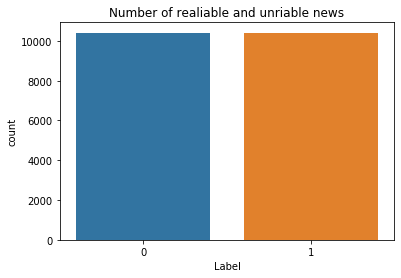

In [0]:
sns.countplot(df_train['label'])
plt.xlabel('Label')
plt.title('Number of realiable and unriable news')

# Preprocessing

- Remove stop words.
- Lemmatization

In [0]:
sentences, label = df_train.text.fillna(' ').values, df_train.label.values.reshape(-1,1)

In [0]:
test_sentences = df_test.text.fillna(' ').values

In [0]:
from copy import deepcopy

sentences_clean = deepcopy(sentences)

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

def filter_sentences(sentences, stop_words, lemmatizer):
    for i, sentence in enumerate(sentences):
      sentence = sentence.lower()
      sentence = [word for word in sentence.split() if word not in stop_words]
      sentence = [lemmatizer.lemmatize(word) for word in sentence]
      sentences[i] = ' '.join(sentence)

    return sentences

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
sentences_clean = filter_sentences(sentences_clean, stop_words, lemmatizer)

In [0]:
sentences[0:5]

array(['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewi

In [0]:
sentences_clean[0:5]

array(['house dem aide: didn’t even see comey’s letter jason chaffetz tweeted darrell lucus october 30, 2016 subscribe jason chaffetz stump american fork, utah ( image courtesy michael jolley, available creative commons-by license) apology keith olbermann, doubt worst person world week–fbi director james comey. according house democratic aide, look like also know second-worst person well. turn comey sent now-infamous letter announcing fbi looking email may related hillary clinton’s email server, ranking democrat relevant committee didn’t hear comey. found via tweet one republican committee chairmen. know, comey notified republican chairman democratic ranking member house intelligence, judiciary, oversight committee agency reviewing email recently discovered order see contained classified information. long letter went out, oversight committee chairman jason chaffetz set political world ablaze tweet. fbi dir informed me, "the fbi learned existence email appear pertinent investigation." c

# Tokenize and Padding

Transform data into a format that will be more easily and effectively processed.

In [0]:
num_words = 5000
maxlen = 150

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

vocab_size

238052

In [0]:
# FOR RAW DATA
or_sents = tokenizer.texts_to_sequences(sentences)
or_sents = sequence.pad_sequences(or_sents, padding='post', maxlen=maxlen)

In [0]:
num_words = 5000
maxlen = 150

tokenizer2 = Tokenizer(num_words=num_words)
tokenizer2.fit_on_texts(sentences_clean)
vocab_size2 = len(tokenizer2.word_index) + 1  # Adding 1 because of reserved 0 index

vocab_size2

235450

In [0]:
# FOR CLEANED DATA
filtered_sents = tokenizer.texts_to_sequences(sentences_clean)
filtered_sents = sequence.pad_sequences(filtered_sents, padding='post', maxlen=maxlen)

# Split Data

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(or_sents, label, test_size=0.2)

In [0]:
X_train_filt, X_test_filt, Y_train_filt, Y_test_filt = train_test_split(filtered_sents, label, test_size=0.2)

In [0]:
sentences[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [0]:
or_sents[0]

array([   1,  240,    6,  725, 3371,    1,  202,  129, 1111,   28,  376,
         59,  472,  203,    2, 1019,   30,    7,  468,  736,   41,  465,
        643,    1, 2176, 3845,   10,   80,   64,   52,   16,    8,    5,
        568,    3,   53,    1,  129,   28,  277,  174,  202,  333,    4,
         16,    8,   66,    1,  391, 1540,  425,    6,    1,  107,   40,
          8,    5,  516,  244, 3433,    3,    1,  324,    3,  296, 1314,
         33,  453,    5, 1794,    3,    1,  381,  287,   29, 1206,    2,
        643,   80,   73,    5,  628,    3,    1, 1116,  166,    6,  616,
         91, 4983,    6, 1822,   80,   73,    1, 1116, 1540,    5, 1351,
         33,    8,   29,  945,   23, 2195,    2,  881,   61,    9,   98,
         33,   21,   47, 4310,   73, 2941,   91, 1344,   56,   16, 3763,
         29,  200,  105, 1992,   34,  116,  130,   80,   10,  610,   15,
       1351,    6,  383,   80,   10,  198,   37, 4240,   12,   80,   10,
        426, 1750,  147,    2, 1096,    5, 4240], d

In [0]:
sentences_clean[0]

'house dem aide: didn’t even see comey’s letter jason chaffetz tweeted darrell lucus october 30, 2016 subscribe jason chaffetz stump american fork, utah ( image courtesy michael jolley, available creative commons-by license) apology keith olbermann, doubt worst person world week–fbi director james comey. according house democratic aide, look like also know second-worst person well. turn comey sent now-infamous letter announcing fbi looking email may related hillary clinton’s email server, ranking democrat relevant committee didn’t hear comey. found via tweet one republican committee chairmen. know, comey notified republican chairman democratic ranking member house intelligence, judiciary, oversight committee agency reviewing email recently discovered order see contained classified information. long letter went out, oversight committee chairman jason chaffetz set political world ablaze tweet. fbi dir informed me, "the fbi learned existence email appear pertinent investigation." case reo

In [0]:
filtered_sents[0]

array([4675,  549,  274,  130,   14,  427,  157, 2306,  128,  322,  198,
        265,  583,  610,  620, 1082, 2152, 2405,  791,  363, 1109,   78,
        643, 1829,  116,  125,  190, 2332,  408,  253,   85, 2093,  216,
         52,  408,  253, 2093,  620,  466, 3114, 1925,  304, 1827,  124,
        125, 3548,  284,   63, 1631, 1651,  369,   85, 4899,  628,  244,
       4316,  468, 1837, 1687,  140,  130,  222, 2795,   99,  370, 1090,
         27, 4999,  202, 1030, 3591, 3282,  640, 4559, 1250,  817,  747,
       4591, 3078,  168,  240,  725, 3371,  202,  129, 1111,  376,  472,
        203, 1019,  468,  736,  465,  643, 2176,  834,   80,   52,  568,
        129,  277,  202,  333,   66,  391, 1540,  425,  107,  516,  244,
       3433,  324,  296, 1314, 1794,  381,  287, 1206,  643,  628, 1116,
        166,  616, 4983, 1822, 1116, 1540,    5, 1351,  945, 2195,  881,
       4310, 2941, 1344, 3763,  200,  105, 1992,  116,  130,  610, 1351,
        383,  198, 4240,  426, 1750, 1096, 4240], d

# Experimentations

MODEL-1 : RNN-LSTM USING UN-FILTERED DATA

In [0]:
embedding_dim = 50

def RNN():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model1 = RNN()
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 50)           11902600  
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [0]:
model1.fit(X_train, Y_train, batch_size=128, epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)]) 

Train on 13312 samples, validate on 3328 samples
Epoch 1/100
13312/13312 [==============================] - 33s 2ms/step - loss: 0.3685 - acc: 0.8426 - val_loss: 0.2075 - val_acc: 0.9213
Epoch 2/100
13312/13312 [==============================] - 31s 2ms/step - loss: 0.1816 - acc: 0.9349 - val_loss: 0.1867 - val_acc: 0.9267
Epoch 3/100
13312/13312 [==============================] - 31s 2ms/step - loss: 0.1402 - acc: 0.9533 - val_loss: 0.1774 - val_acc: 0.9342
Epoch 4/100
13312/13312 [==============================] - 32s 2ms/step - loss: 0.1111 - acc: 0.9637 - val_loss: 0.2440 - val_acc: 0.9225


MODEL-2 : RNN-LSTM USING FILTERED DATA

In [0]:
embedding_dim = 50

def RNN2():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(input_dim=vocab_size2, output_dim=embedding_dim, input_length=maxlen)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model2 = RNN2()
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 150, 50)           11772500  
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [0]:
model2.fit(X_train_filt, Y_train_filt, batch_size=128, epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 13312 samples, validate on 3328 samples
Epoch 1/100
13312/13312 [==============================] - 33s 2ms/step - loss: 0.3314 - acc: 0.8622 - val_loss: 0.1933 - val_acc: 0.9360
Epoch 2/100
13312/13312 [==============================] - 31s 2ms/step - loss: 0.1462 - acc: 0.9506 - val_loss: 0.1989 - val_acc: 0.9360


MODEL-3 : RNN-GRU USING UN-FILTERED DATA

In [0]:
embedding_dim = 50

def RNN3():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen)(inputs)
    layer = GRU(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model3 = RNN3()
model3.summary()
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 150, 50)           11902600  
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                22080     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [0]:
model3.fit(X_train, Y_train, batch_size=128, epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)]) 

Train on 13312 samples, validate on 3328 samples
Epoch 1/100
13312/13312 [==============================] - 29s 2ms/step - loss: 0.3664 - acc: 0.8479 - val_loss: 0.2113 - val_acc: 0.9141
Epoch 2/100
13312/13312 [==============================] - 27s 2ms/step - loss: 0.1915 - acc: 0.9309 - val_loss: 0.2273 - val_acc: 0.9081


MODEL-4 : RNN-GRU USING FILTERED DATA

In [0]:
embedding_dim = 50

def RNN4():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(input_dim=vocab_size2, output_dim=embedding_dim, input_length=maxlen)(inputs)
    layer = GRU(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model4 = RNN4()
model4.summary()
model4.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 150, 50)           11772500  
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                22080     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [0]:
model4.fit(X_train_filt, Y_train_filt, batch_size=128, epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)]) 

Train on 13312 samples, validate on 3328 samples
Epoch 1/100
13312/13312 [==============================] - 29s 2ms/step - loss: 0.3814 - acc: 0.8436 - val_loss: 0.2033 - val_acc: 0.9327
Epoch 2/100
13312/13312 [==============================] - 26s 2ms/step - loss: 0.1619 - acc: 0.9442 - val_loss: 0.2216 - val_acc: 0.9201


# Evaluation

TEST MODEL-1

In [0]:
acc1 = model1.evaluate(X_test, Y_test)
acc

4160/4160 [==============================] - 14s 3ms/step


[0.2565278622536705, 0.9211538461538461]

In [0]:
acc2 = model1.evaluate(X_test_filt, Y_test_filt)
acc2

4160/4160 [==============================] - 14s 3ms/step


[0.14182157594209108, 0.958173076923077]

TEST MODEL-2

In [0]:
acc3 = model2.evaluate(X_test_filt, Y_test_filt)
acc3

4160/4160 [==============================] - 14s 3ms/step


[0.23839040405761738, 0.9259615384615385]

In [0]:
acc4 = model2.evaluate(X_test, Y_test)
acc4

4160/4160 [==============================] - 14s 3ms/step


[1.859658122062683, 0.5528846153846154]

TEST MODEL-3

In [0]:
acc5 = model3.evaluate(X_test, Y_test)
acc5

4160/4160 [==============================] - 13s 3ms/step


[0.2253898473026661, 0.9064903846153847]

In [0]:
acc6 = model3.evaluate(X_test_filt, Y_test_filt)
acc6

4160/4160 [==============================] - 13s 3ms/step


[0.2024756430863188, 0.9161057692307693]

TEST MODEL-4

In [0]:
acc7 = model4.evaluate(X_test_filt, Y_test_filt)
acc7

4160/4160 [==============================] - 13s 3ms/step


[0.2542210065258237, 0.8992788461538461]

In [0]:
acc8 = model4.evaluate(X_test, Y_test)
acc8

4160/4160 [==============================] - 13s 3ms/step


[0.8119424113860497, 0.682451923076923]